In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
pd.set_option("display.max_rows", 60, "display.max_columns", 60)

In [3]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.21.1 scipy==1.7.1 pandas==1.3.1 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 pynndescent==0.5.4


In [4]:
results_file = "write/GSM2560245.h5ad"

In [5]:
adata = sc.read_10x_mtx('/mnt/disks/mount_dir/GSM2560245',var_names='gene_symbols',cache=True)

... reading from cache file cache/mnt-disks-mount_dir-GSM2560245-matrix.h5ad


In [6]:
adata.var_names_make_unique()

In [7]:
adata

AnnData object with n_obs × n_vars = 3639 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


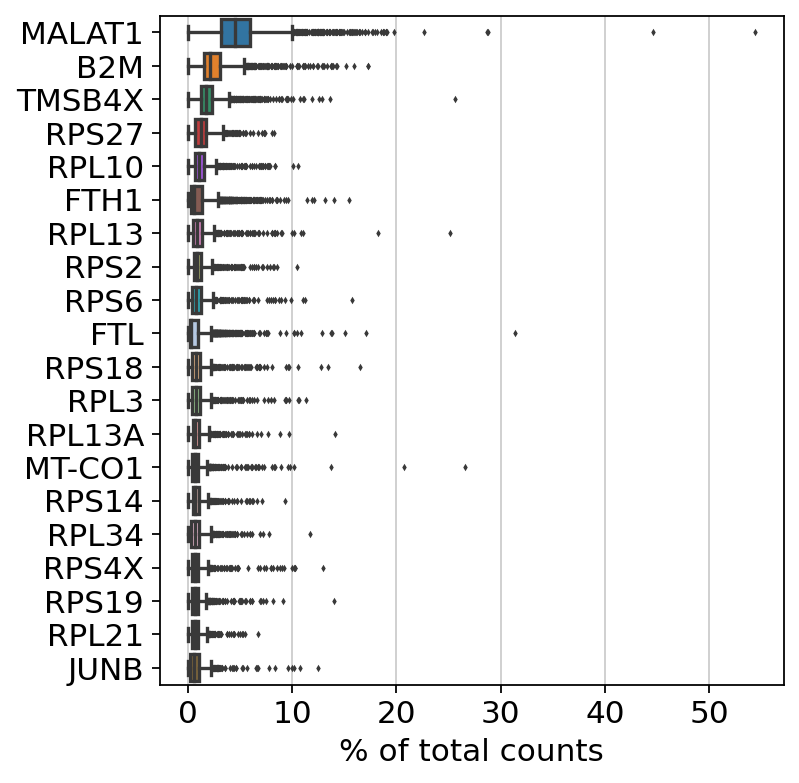

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
demuxlet=pd.read_csv('/mnt/disks/mount_dir/demuxlet_files/demuxlet_data_main.csv',delimiter='\t')

In [10]:
demuxlet_assign=demuxlet.BEST.to_list()


In [11]:
adata.obs['demuxlet_assignment']=demuxlet_assign

In [12]:
souporcell=pd.read_csv('/mnt/disks/mount_dir/soupor_out/clusters.csv', delimiter='\t')

In [13]:
souporcell['assignment'] = souporcell[['status', 'assignment']].agg('-'.join, axis=1)

In [14]:
souporcell_assign=souporcell.assignment.to_list()

In [15]:
adata.obs['souporcell_assignment']=souporcell_assign

In [16]:
adata

AnnData object with n_obs × n_vars = 3639 × 32738
    obs: 'demuxlet_assignment', 'souporcell_assignment'
    var: 'gene_ids'

In [17]:
demuxlet_assign_simple=[]
for drop in demuxlet_assign:
    if drop[0] == 'S':
        demuxlet_assign_simple.append('SNG')
    else:
        demuxlet_assign_simple.append('DBL')

In [18]:
adata.obs['demuxlet_assignment_simple']=demuxlet_assign_simple

In [19]:
souporcell_assign_simple=[]
for bar in souporcell_assign:
    if bar[0] == 's':
        souporcell_assign_simple.append('SNG')
    else:
        souporcell_assign_simple.append('DBL')

In [20]:
adata.obs['souporcell_assignment_simple']=souporcell_assign_simple

In [21]:
demuxlet_souporcell_assign=[]
for a in range(len(souporcell_assign)):
    if souporcell_assign_simple[a] == 'SNG' and demuxlet_assign_simple[a] == 'SNG':
        demuxlet_souporcell_assign.append('SNG')
    elif souporcell_assign_simple[a] == 'SNG' and demuxlet_assign_simple[a] == 'DBL':
        demuxlet_souporcell_assign.append('demuxlet_DBL')
    elif souporcell_assign_simple[a] == 'DBL' and demuxlet_assign_simple[a] == 'SNG':
        demuxlet_souporcell_assign.append('souporcell_DBL')
    else:
        demuxlet_souporcell_assign.append('DBL')
        

In [22]:
adata.obs['demuxlet_souporcell_assignment']= demuxlet_souporcell_assign

In [23]:
sample_assign=[]
for s in range(len(souporcell_assign)):
    if souporcell_assign[s] == 'singlet-0':
        sample_assign.append('1154')
    elif souporcell_assign[s] == 'singlet-1':
        sample_assign.append('1598')
    elif souporcell_assign[s] == 'singlet-2':
        sample_assign.append('1079')
    elif souporcell_assign[s] == 'singlet-3':
        sample_assign.append('1249')
    else:
        sample_assign.append('DBL')

In [24]:
adata.obs['sample_assignment']=sample_assign

In [25]:
adata.obs['sample_assignment'].value_counts()

1154    1005
1079     900
1249     815
1598     805
DBL      114
Name: sample_assignment, dtype: int64

In [26]:
adata.obs.head(60)

,demuxlet_assignment,souporcell_assignment,demuxlet_assignment_simple,souporcell_assignment_simple,demuxlet_souporcell_assignment,sample_assignment
AAACATACCACTCC-1,SNG-1079,singlet-2,SNG,SNG,SNG,1079
AAACATACCGCTAA-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154
AAACATACTAACGC-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154
AAACATACTTATCC-1,DBL-1311-1079-0.600,singlet-2,DBL,SNG,demuxlet_DBL,1079
AAACATTGCATGGT-1,SNG-1598,unassigned-0,SNG,DBL,souporcell_DBL,DBL
AAACCGTGTCGCAA-1,SNG-1598,singlet-1,SNG,SNG,SNG,1598
AAACGCACACCTCC-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154
AAACGCACCTGCAA-1,SNG-1598,singlet-1,SNG,SNG,SNG,1598
AAACGCACTAGACC-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154
AAACGCACTGCTCC-1,SNG-1079,singlet-2,SNG,SNG,SNG,1079


In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 97 cells that have less than 200 genes expressed
filtered out 20400 genes that are detected in less than 3 cells


In [28]:
adata.obs['demuxlet_souporcell_assignment'].value_counts()

SNG               2861
demuxlet_DBL       573
DBL                104
souporcell_DBL       4
Name: demuxlet_souporcell_assignment, dtype: int64

In [29]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'demuxlet_assignment' as categorical
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'souporcell_assignment' as categorical
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be remo

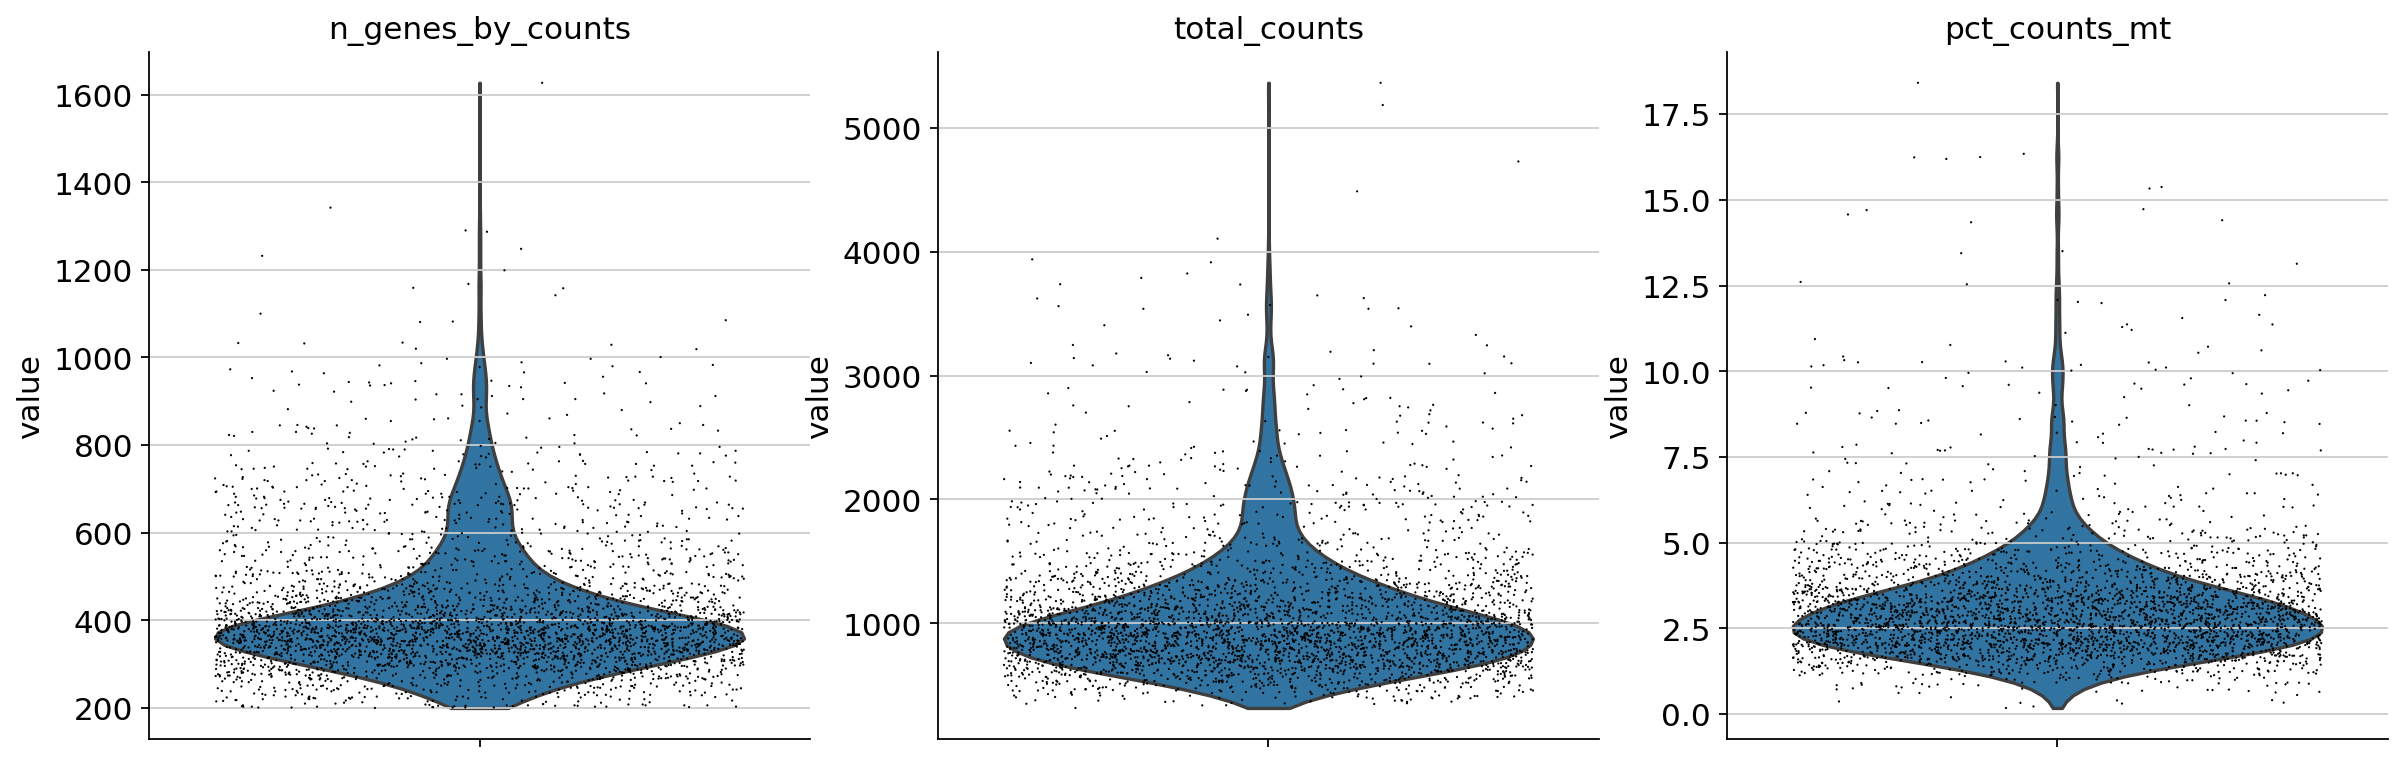

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

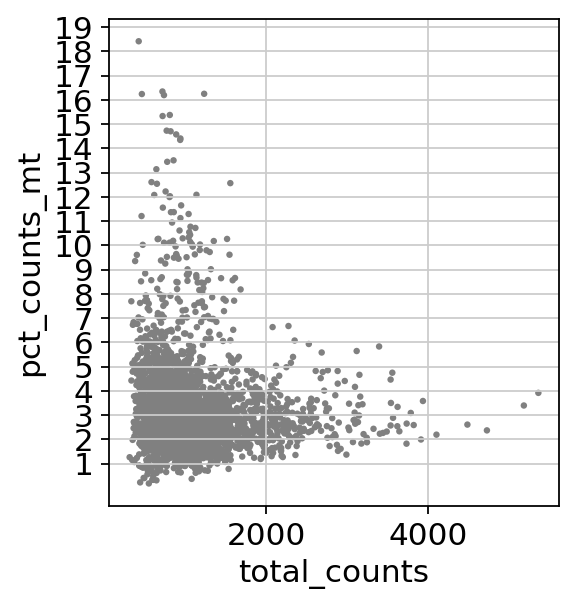

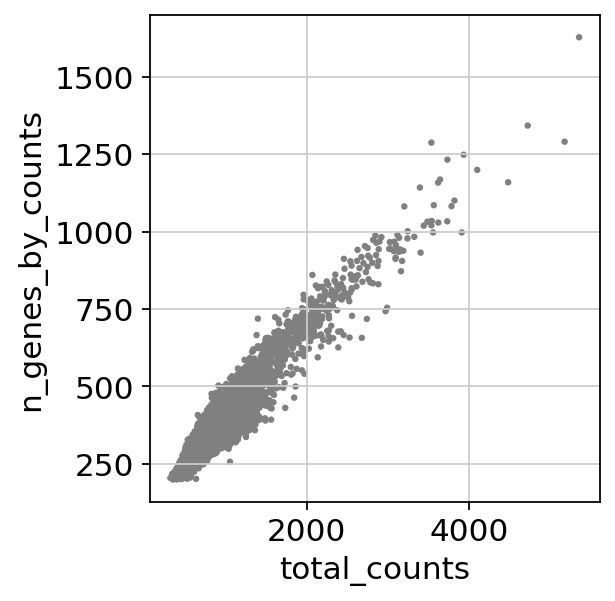

In [31]:
ax=sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',show=False)
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [32]:
adata.obs['remove']='no'

In [33]:
removes=adata.obs.nlargest((round(len(adata.obs['n_genes_by_counts'])/100)),'n_genes_by_counts').index.to_list()
adata.obs.loc[removes,'remove'] = 'yes'

In [34]:
remove_mt=[]
count=0
for cell in adata.obs.pct_counts_mt >6:
    if cell == True:
        remove_mt.append((adata.obs.pct_counts_mt >6).index[count])
    count+=1
len(remove_mt)


193

In [35]:
adata.obs.loc[remove_mt,'remove']='yes'

In [36]:
adata.obs['remove'].value_counts()

no     3314
yes     228
Name: remove, dtype: int64

In [37]:
remove_ls = adata.obs['remove'].to_list()

In [38]:
len(remove_ls)

3542

In [39]:
demuxlet_souporcell_assign_ls = adata.obs['demuxlet_souporcell_assignment'].to_list()

In [40]:
len(demuxlet_souporcell_assign_ls)

3542

In [41]:
remove_assign=[]
for r in range(len(demuxlet_souporcell_assign_ls)):
    if demuxlet_souporcell_assign_ls[r] == 'SNG' and remove_ls[r] == 'yes':
        remove_assign.append('SNG_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'DBL' and remove_ls[r] == 'yes':
        remove_assign.append('DBL_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'demuxlet_DBL' and remove_ls[r] == 'yes':
        remove_assign.append('demuxlet_DBL_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'souporcell_DBL' and remove_ls[r] == 'yes':
        remove_assign.append('souporcell_DBL_remove')
    elif demuxlet_souporcell_assign_ls[r] == 'SNG' and remove_ls[r] == 'no':
        remove_assign.append('SNG_keep')
    elif demuxlet_souporcell_assign_ls[r] == 'DBL' and remove_ls[r] == 'no':
        remove_assign.append('DBL_keep')
    elif demuxlet_souporcell_assign_ls[r] == 'demuxlet_DBL' and remove_ls[r] == 'no':
        remove_assign.append('demuxlet_DBL_keep')
    elif demuxlet_souporcell_assign_ls[r] == 'souporcell_DBL' and remove_ls[r] == 'no':
        remove_assign.append('souporcell_DBL_keep')

In [42]:
adata.obs['remove_assignment']=remove_assign

In [43]:
adata.obs['remove_assignment'].value_counts()

SNG_keep                 2676
demuxlet_DBL_keep         539
SNG_remove                185
DBL_keep                   96
demuxlet_DBL_remove        34
DBL_remove                  8
souporcell_DBL_keep         3
souporcell_DBL_remove       1
Name: remove_assignment, dtype: int64

In [44]:
adata.obs['remove_assignment'].value_counts(normalize=True) * 100


SNG_keep                 75.550536
demuxlet_DBL_keep        15.217391
SNG_remove                5.223038
DBL_keep                  2.710333
demuxlet_DBL_remove       0.959910
DBL_remove                0.225861
souporcell_DBL_keep       0.084698
souporcell_DBL_remove     0.028233
Name: remove_assignment, dtype: float64

In [45]:
adata.obs['demuxlet_assignment_simple'].value_counts(normalize=True) * 100

SNG    80.886505
DBL    19.113495
Name: demuxlet_assignment_simple, dtype: float64

In [46]:
adata.obs['souporcell_assignment_simple'].value_counts(normalize=True) * 100

SNG    96.950875
DBL     3.049125
Name: souporcell_assignment_simple, dtype: float64

In [47]:
adata.obs['demuxlet_souporcell_assignment'].value_counts(normalize=True) * 100

SNG               80.773574
demuxlet_DBL      16.177301
DBL                2.936194
souporcell_DBL     0.112931
Name: demuxlet_souporcell_assignment, dtype: float64

In [48]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [49]:
sc.pp.log1p(adata)

In [50]:
adata.raw = adata

In [51]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'remove' as categorical
/home/akivakohane/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'remove_assignment' as categorical


    finished (0:01:38)


In [52]:
sc.pp.scale(adata, max_value=10)

In [53]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:07)


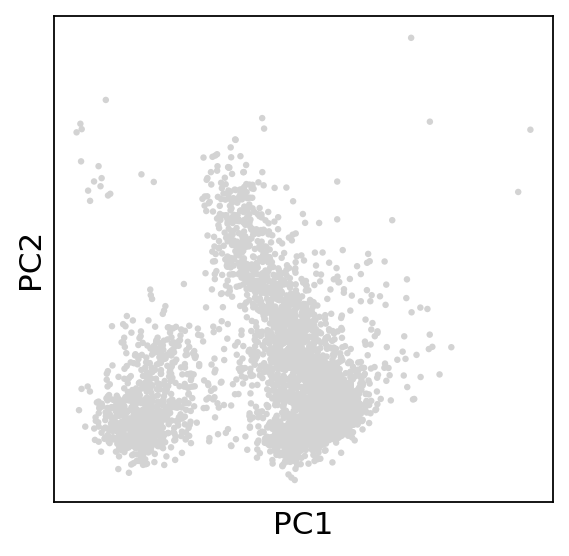

In [54]:
sc.pl.pca(adata)

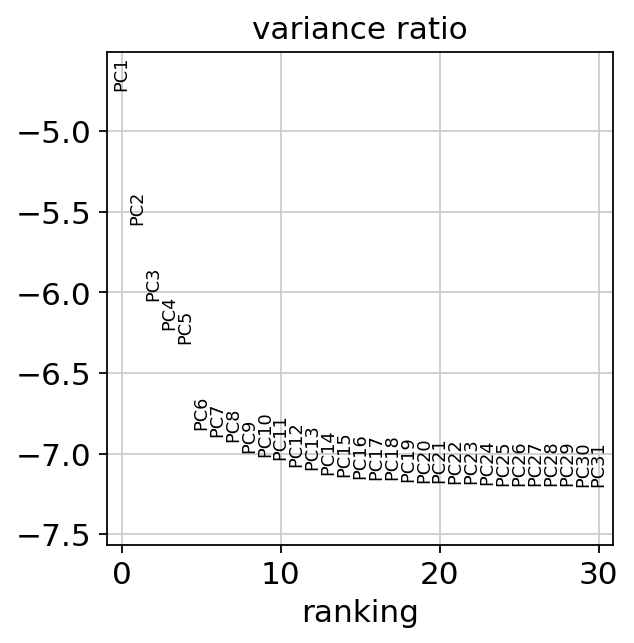

In [55]:
sc.pl.pca_variance_ratio(adata,n_pcs=30, log=True)


In [56]:
adata.write(results_file)

In [57]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [58]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [59]:
adata.obs['demuxlet_assignment_simple'].value_counts()

SNG    2865
DBL     677
Name: demuxlet_assignment_simple, dtype: int64

In [60]:
adata.obs['souporcell_assignment_simple'].value_counts()

SNG    3434
DBL     108
Name: souporcell_assignment_simple, dtype: int64

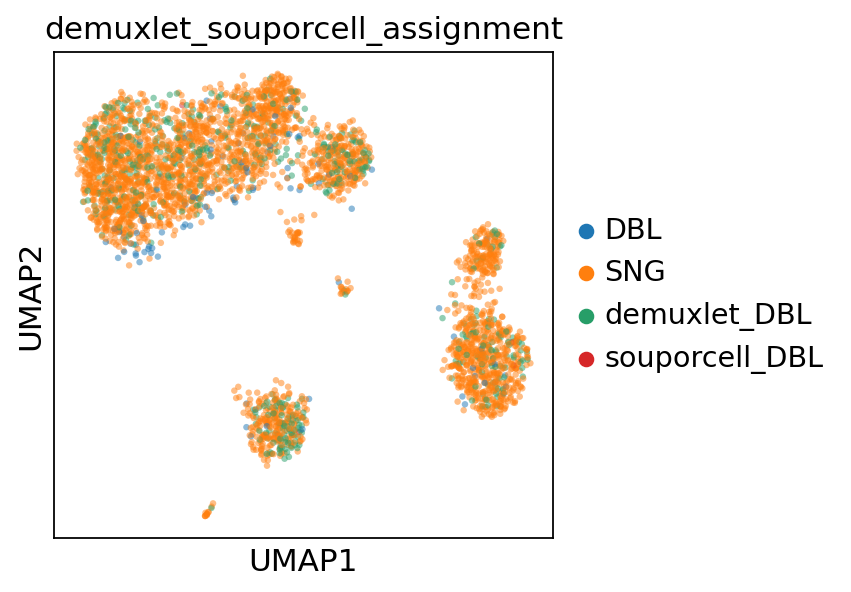

In [61]:
sc.pl.umap(adata, color ='demuxlet_souporcell_assignment', alpha=.5)

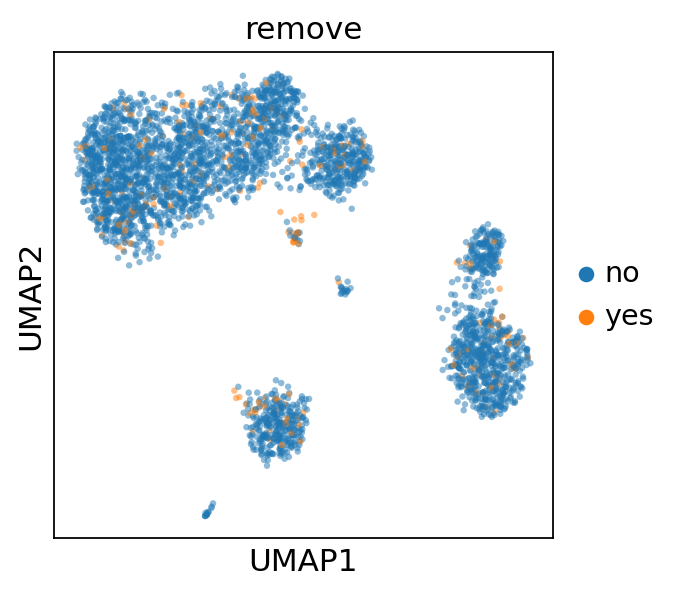

In [62]:
sc.pl.umap(adata, color ='remove', alpha=.5)

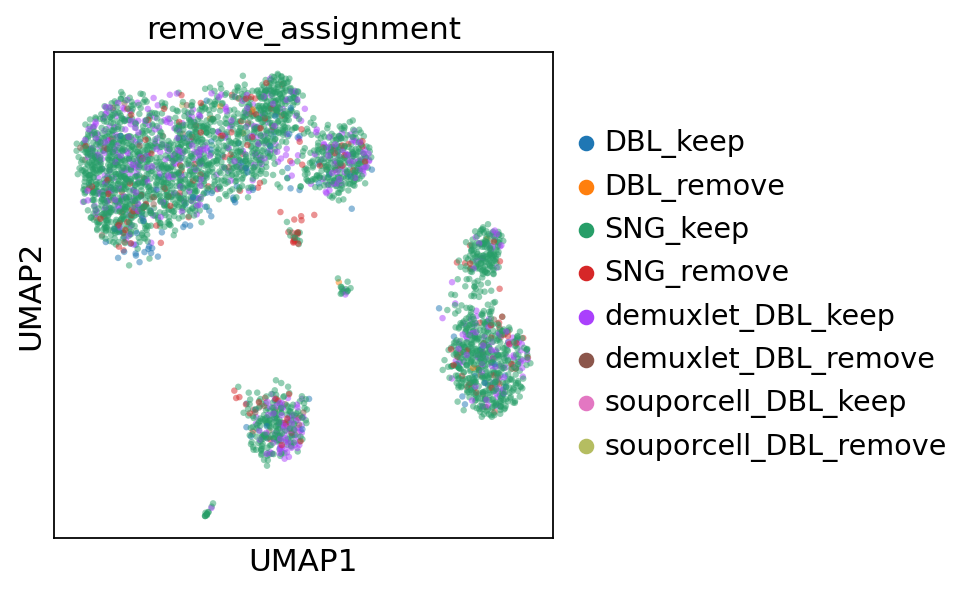

In [63]:
sc.pl.umap(adata, color ='remove_assignment', alpha=.5)

In [ ]:
adata.write(results_file)

In [ ]:
len(adata.obs.index)

3542

In [ ]:
adata= adata[adata.obs.remove.str.startswith('no'), :]

In [ ]:
adata.obs

,demuxlet_assignment,souporcell_assignment,demuxlet_assignment_simple,souporcell_assignment_simple,demuxlet_souporcell_assignment,sample_assignment,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,remove,remove_assignment
AAACATACCACTCC-1,SNG-1079,singlet-2,SNG,SNG,SNG,1079,380,378,1034.0,16.0,1.547389,no,SNG_keep
AAACATACCGCTAA-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154,831,830,2885.0,139.0,4.818024,no,SNG_keep
AAACATACTAACGC-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154,400,400,883.0,39.0,4.416761,no,SNG_keep
AAACATACTTATCC-1,DBL-1311-1079-0.600,singlet-2,DBL,SNG,demuxlet_DBL,1079,403,403,1169.0,13.0,1.112062,no,demuxlet_DBL_keep
AAACCGTGTCGCAA-1,SNG-1598,singlet-1,SNG,SNG,SNG,1598,369,368,951.0,16.0,1.682439,no,SNG_keep
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTACTTC-1,SNG-1079,singlet-2,SNG,SNG,SNG,1079,560,560,1502.0,26.0,1.731025,no,SNG_keep
TTTCGAACTCCTGC-1,DBL-1488-1079-0.600,singlet-2,DBL,SNG,demuxlet_DBL,1079,267,266,519.0,12.0,2.312139,no,demuxlet_DBL_keep
TTTCGAACTCTGGA-1,SNG-1249,singlet-3,SNG,SNG,SNG,1249,389,388,1076.0,47.0,4.368030,no,SNG_keep
TTTCTACTCAGTCA-1,SNG-1154,singlet-0,SNG,SNG,SNG,1154,597,597,1555.0,41.0,2.636656,no,SNG_keep


In [ ]:
len(adata.obs.index)

3314

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:06)


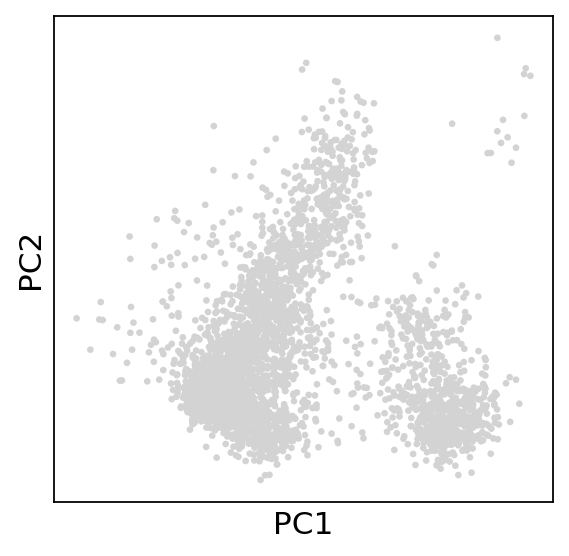

In [ ]:
sc.pl.pca(adata)

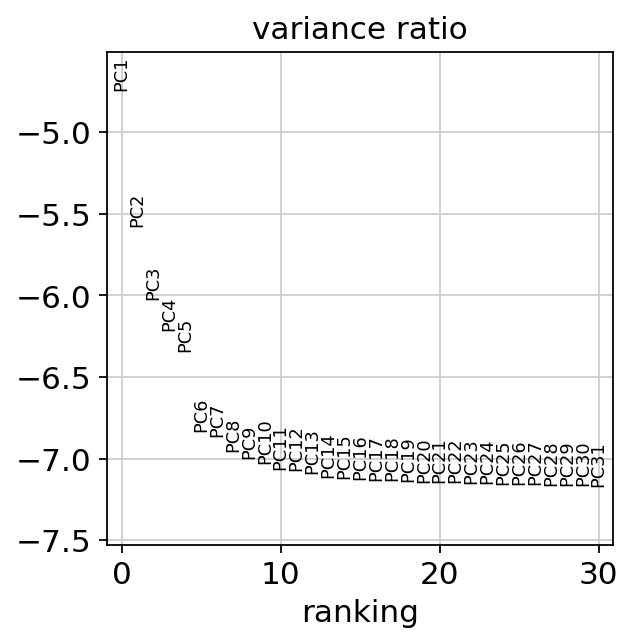

In [ ]:
sc.pl.pca_variance_ratio(adata,n_pcs=30, log=True)

In [ ]:
adata.write(results_file)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [ ]:
adata.obs['demuxlet_souporcell_assignment'].value_counts()

SNG               2676
demuxlet_DBL       539
DBL                 96
souporcell_DBL       3
Name: demuxlet_souporcell_assignment, dtype: int64

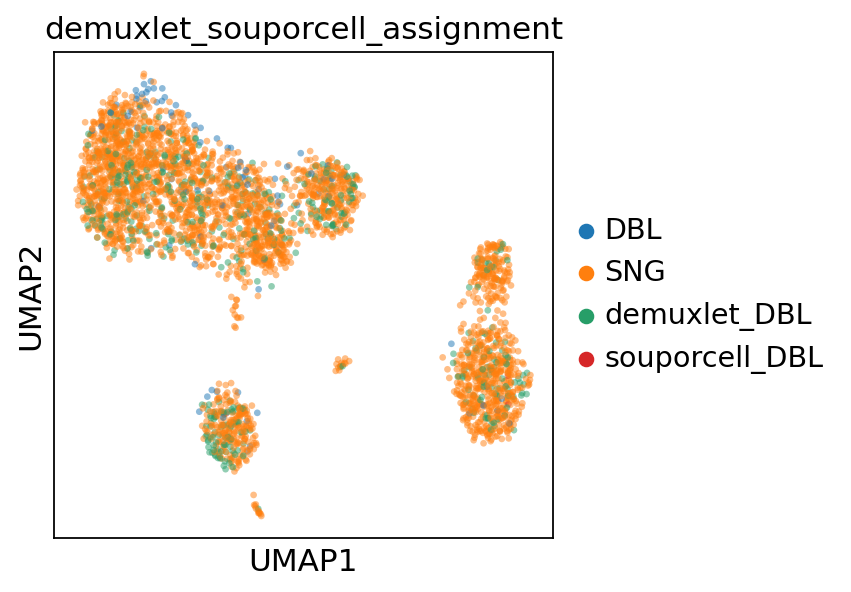

In [ ]:
sc.pl.umap(adata, color ='demuxlet_souporcell_assignment', alpha=.5)

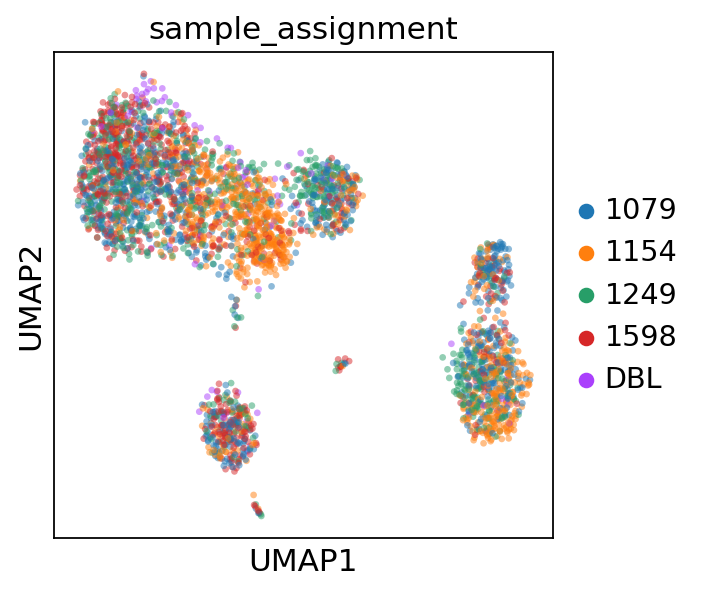

In [78]:
sc.pl.umap(adata, color ='sample_assignment', alpha=.5)